# Customer Churn Prediction for Telco

## Install all relevant libraries 

In [55]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)  # Ignore future warnings for cleaner output

#Data Handling & Visualization
import pandas as pd  # Data manipulation and analysis
import matplotlib.pyplot as plt  # Static data visualization
import seaborn as sns  # Advanced statistical data visualization
import plotly.express as px  # Interactive data visualization
import numpy as np
#Machine Learning Models & Preprocessing
from sklearn.model_selection import train_test_split  # Splitting dataset into training and testing sets
from sklearn.preprocessing import StandardScaler  # Feature scaling for numerical stability
from sklearn.linear_model import LogisticRegression  # Logistic Regression model for classification
from sklearn.ensemble import RandomForestClassifier  # Random Forest model for classification
from sklearn.tree import DecisionTreeClassifier  # Decision Tree model for classification

#Model Evaluation Metrics
from sklearn.metrics import (
    accuracy_score,  # Computes model accuracy
    classification_report,  # Detailed classification metrics (precision, recall, F1-score)
    confusion_matrix,  # Creates a confusion matrix to evaluate classification performance
    roc_curve,  # Computes the Receiver Operating Characteristic (ROC) curve
    auc,  # Calculates Area Under the Curve (AUC) for ROC
    roc_auc_score  # Computes AUC-ROC score for model evaluation
)
from sklearn.model_selection import GridSearchCV #used for hyperparameter tuning in machine learning


## 1. Data Collection/ Acquisition

### Read the data

In [2]:
df = pd.read_csv(r"C:\Users\Arya\Downloads\WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [3]:
print(df.head()) #display the first five rows of the dataframe df

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

## 2. Data Preparation

In [4]:
df.shape #returns the dimensions of the dataframe df

(7043, 21)

In [5]:
print(df.columns.tolist()) #returns a list of all column names 

['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']


In [6]:
df.info() #provides a summary of the dataframe,number of entries, column names and their data types, non-null counts and memory usage of the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### 2.1 Data Cleaning

In [7]:
df.isnull().sum() #checks for missing values in each column of the dataframe df

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [8]:
df.duplicated().sum() #checks for duplicate rows in the dataframe df

0

## EDA and Visualization of the dataset

In [9]:
print(df.describe())# Get summary statistics for numerical columns

       SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000


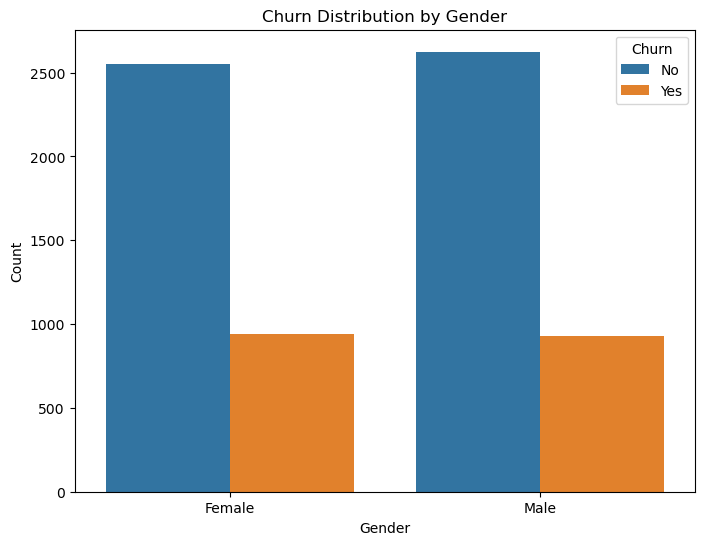

In [10]:
# Create a gender-based bar plot for churn
plt.figure(figsize=(8, 6))
sns.countplot(x='gender', hue='Churn', data=df)
plt.title('Churn Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

Note: The graph shows that there are no significant differences between Male and Female customers in relation to Churn.

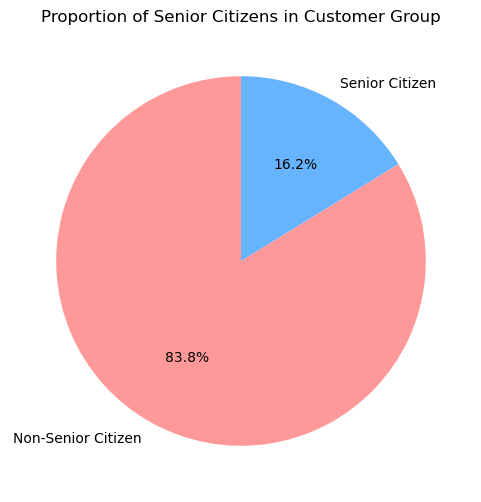

In [11]:
#Plot a pie-chart to see customer population composition based on age
senior_counts = df['SeniorCitizen'].value_counts()

# Plot the pie chart
plt.figure(figsize=(6, 6))
plt.pie(senior_counts, labels=['Non-Senior Citizen', 'Senior Citizen'], autopct='%1.1f%%', startangle=90, colors=['#ff9999', '#66b3ff'])
plt.title('Proportion of Senior Citizens in Customer Group')
plt.show()

Note: The pie-chart shows that only 16.2% of the total customers are Senior citizens.

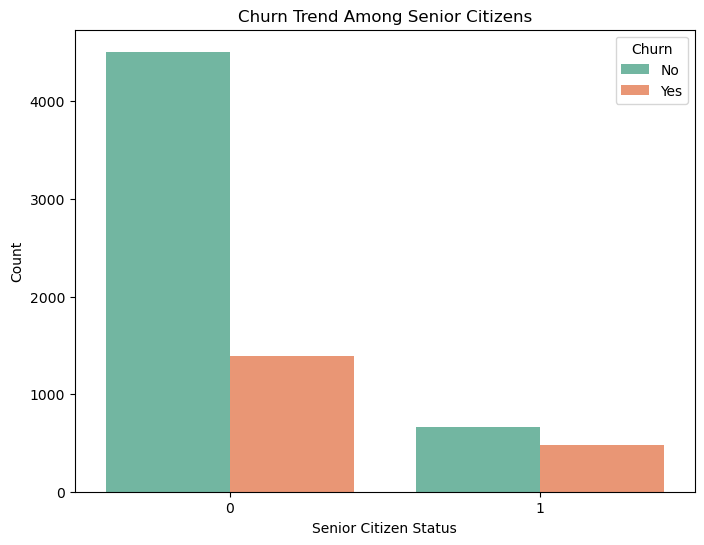

In [12]:
# Plot a bar chart for senior citizens in relation to churn
plt.figure(figsize=(8, 6))
sns.countplot(x='SeniorCitizen', hue='Churn', data=df, palette='Set2')
plt.title('Churn Trend Among Senior Citizens')
plt.xlabel('Senior Citizen Status')
plt.ylabel('Count')
plt.show()

Note: The graph shows that among the senior citizen the churn to no churn ratio is greater than non-senior citizens, meaning senior citizens are more likely to churn.

In [13]:
# Plot a histogram based on contract type and churn
pastel_colors = {
    "Month-to-month": "#A1D6E2",  
    "One year": "#FFDDC1",        
    "Two year": "#B5EAD7"        
}

fig = px.histogram(
    df, x="Churn", color="Contract", barmode="group",
    title="<b>Churn based on Customer Contract</b>",
    color_discrete_map=pastel_colors
)

fig.update_layout(
    width=700, height=500, bargap=0.1,
    plot_bgcolor="white",
    paper_bgcolor="white"
)

fig.show()

Note: The graph above shows that the longer the customer's contract it the lesser the likelyhood of them to churn.

In [14]:
# Plot a histogram based on costumer and churn
pastel_colors = ["#FFB6C1", "#ADD8E6", "#FAD7A0", "#D8BFD8"]  

fig = px.histogram(df, x="Churn", color="PaymentMethod", 
                   title="<b>Churn based on Customer Payment Method</b>",
                   color_discrete_sequence=pastel_colors)  
fig.update_layout(
    plot_bgcolor="white",
    paper_bgcolor="white",  
    width=700, height=500, 
    bargap=0.1,
    xaxis_title="Churn", 
    yaxis_title="Count", 
    legend_title="Payment Method"
)

fig.show()

Note: The image showcases that customers who pay through elctronic checks are more liekly to churn than customers who pay through other means.

In [15]:
# Plot a histogram based on dependents and churn
pastel_colors = {"Yes": "#FFB6C1", "No": "#ADD8E6"} 

fig = px.histogram(df, x="Churn", color="Dependents", barmode="group", 
                   title="<b>Churn based on Dependents</b>", 
                   color_discrete_map=pastel_colors)

fig.update_layout(
    plot_bgcolor="white",
    paper_bgcolor="white",
    width=700, height=500, 
    bargap=0.1,
    xaxis_title="Churn", 
    yaxis_title="Count", 
    legend_title="Dependents"
)

fig.show()

Note: The image showcases that customers with dependent are less likely to churn than customers who do not have dependents.

In [16]:
# Plot a histogram based on partners and churn
pastel_colors = {"Yes": "#FAD7A0", "No": "#A2D9CE"}

fig = px.histogram(df, x="Churn", color="Partner", barmode="group", 
                   title="<b>Churn based on Partners</b>", 
                   color_discrete_map=pastel_colors)

fig.update_layout(
    plot_bgcolor="white", 
    paper_bgcolor="white",
    width=700, height=500, 
    bargap=0.1,
    xaxis_title="Churn", 
    yaxis_title="Count", 
    legend_title="Partner"
)

fig.show()

Note: Tha image showcases that customers with partners are more liekly to not churn as opposed to customers with partners.

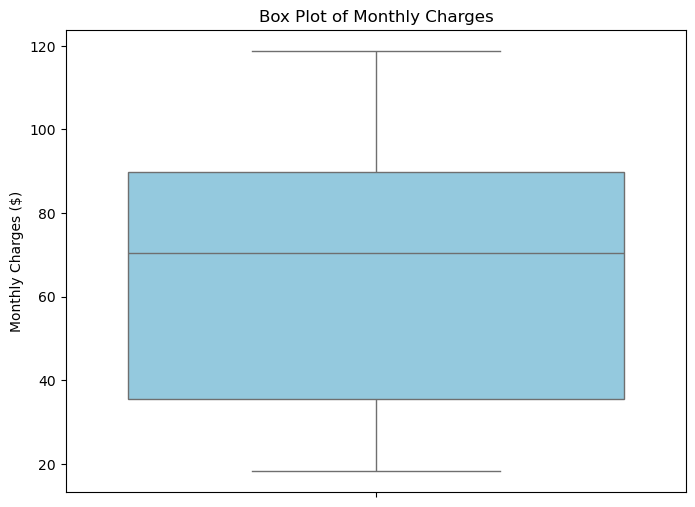

In [17]:
# Plot a box plot for Monthly Charges
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['MonthlyCharges'], color='skyblue')
plt.title('Box Plot of Monthly Charges')
plt.ylabel('Monthly Charges ($)')
plt.show()

Note: The boxplot reveals that the median monthly spending is around $70, with most customers spending between $38 and $90.

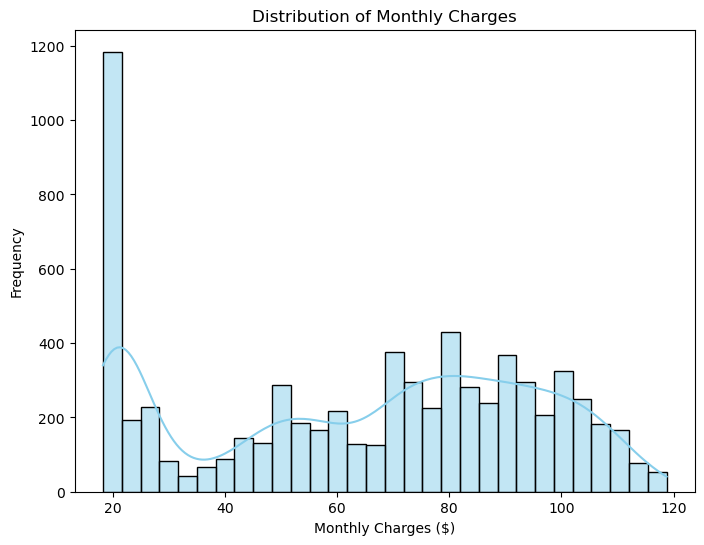

In [18]:
# Plot histogram for Monthly Charges
plt.figure(figsize=(8, 6))
sns.histplot(df['MonthlyCharges'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Monthly Charges')
plt.xlabel('Monthly Charges ($)')
plt.ylabel('Frequency')
plt.show()

Note: The distribution of the chart is positively skewed only due to the charges that fall under the 20 category but is otherwise normally distributed.

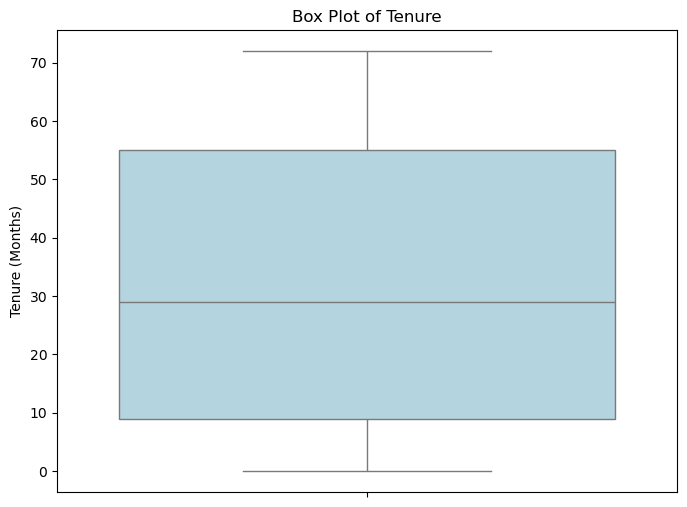

In [19]:
# Plot a box plot for tenure
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['tenure'], color='lightblue')
plt.title('Box Plot of Tenure')
plt.ylabel('Tenure (Months)')
plt.show()

Note: The boxplot reveals that the median customer tenure is around 30 months, with most customers having a tenure between 10 months to 55 months.

#### 2.1.1 Converting categorical values

In [20]:
df["gender"].unique() #returns the unique values in the "gender" column of the dataframe df

array(['Female', 'Male'], dtype=object)

In [21]:
# Encode 'Male' as 1 and 'Female' as 0
df["gender"] = df["gender"].map({"Male": 1, "Female": 0})

In [22]:
df["SeniorCitizen"].unique() #returns the unique values in the "SeniorCitizen" column of the dataframe df

array([0, 1], dtype=int64)

In [23]:
df["Partner"].unique()#returns the unique values in the "Partner" column of the dataframe df

array(['Yes', 'No'], dtype=object)

In [24]:
#Encode "Yes" as 1 and "No" as 0
df["Partner"] = df["Partner"].map({"Yes": 1, "No": 0})

In [25]:
df["Dependents"].unique()#returns the unique values in the "Dependents" column of the dataframe df

array(['No', 'Yes'], dtype=object)

In [26]:
#Encode "Yes" as 1 and "No" as 0
df["Dependents"] = df["Dependents"].map({"Yes": 1, "No": 0})

In [27]:
df["PhoneService"].unique() #returns the unique values in the "PhoneService" column of the dataframe df

array(['No', 'Yes'], dtype=object)

In [28]:
#Encode "Yes" as 1 and "No" as 0
df["PhoneService"] = df["PhoneService"].map({"Yes": 1, "No": 0})

In [29]:
df["MultipleLines"].unique() #returns the unique values in the "MultipleLines" column of the dataframe df

array(['No phone service', 'No', 'Yes'], dtype=object)

In [30]:
#Encode "No phone service": 0, "No": 1, "Yes": 2
df["MultipleLines"] = df["MultipleLines"].replace({
    "No phone service": 0,
    "No": 1,
    "Yes": 2
}).astype(int)

In [31]:
df["InternetService"].unique() #returns the unique values in the "InternetService" column of the dataframe df

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [32]:
#Encode 'DSL'= 2, 'Fiber optic'=1, 'No'=0
df["InternetService"] = df["InternetService"].replace({
    "DSL": 2,
    "Fiber optic": 1,
    "No": 0
})

In [33]:
df["OnlineSecurity"].unique() #returns the unique values in the "OnlineSecurity" column of the dataframe df

array(['No', 'Yes', 'No internet service'], dtype=object)

In [34]:
#Encode 'Yes'= 2, 'No'=1, 'No internet service'=0
df["OnlineSecurity"] = df["OnlineSecurity"].replace({
    "No": 1,
    "Yes": 2,
    "No internet service": 0
})

In [35]:
df["OnlineBackup"].unique() #returns the unique values in the "OnlineBackup" column of the dataframe df

array(['Yes', 'No', 'No internet service'], dtype=object)

In [36]:
#Encode 'Yes'= 2, 'No'=1, 'No internet service'=0
df["OnlineBackup"] = df["OnlineBackup"].replace({
    "No": 1,
    "Yes": 2,
    "No internet service": 0
})

In [37]:
df["DeviceProtection"].unique() #returns the unique values in the "DeviceProtection" column of the dataframe df

array(['No', 'Yes', 'No internet service'], dtype=object)

In [38]:
#Encode 'Yes'= 2, 'No'=1, 'No internet service'=0
df["DeviceProtection"] = df["DeviceProtection"].replace({
    "No": 1,
    "Yes": 2,
    "No internet service": 0
})

In [39]:
df["TechSupport"].unique()#returns the unique values in the "TechSupport" column of the dataframe df

array(['No', 'Yes', 'No internet service'], dtype=object)

In [40]:
#Encode 'Yes'= 2, 'No'=1, 'No internet service'=0
df["TechSupport"] = df["TechSupport"].replace({
    "No": 1,
    "Yes": 2,
    "No internet service": 0
})

In [41]:
df["StreamingTV"].unique() #returns the unique values in the "StreamingTV" column of the dataframe df

array(['No', 'Yes', 'No internet service'], dtype=object)

In [42]:
#Encode 'Yes'= 2, 'No'=1, 'No internet service'=0
df["StreamingTV"] = df["StreamingTV"].replace({
    "No": 1,
    "Yes": 2,
    "No internet service": 0
})

In [43]:
df["StreamingMovies"].unique()#returns the unique values in the "StreamingMovies" column of the dataframe df

array(['No', 'Yes', 'No internet service'], dtype=object)

In [44]:
#Encode 'Yes'= 2, 'No'=1, 'No internet service'=0
df["StreamingMovies"] = df["StreamingMovies"].replace({
    "No": 1,
    "Yes": 2,
    "No internet service": 0
})

In [45]:
df["Contract"].unique() #returns the unique values in the "Contract" column of the dataframe df

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [46]:
#Encode 'Two year'= 2, 'One year'=1, 'Month-to-month'=0
df["Contract"] = df["Contract"].replace({
    "One year": 1,
    "Two year": 2,
    "Month-to-month": 0
})

In [47]:
df["PaperlessBilling"].unique() #returns the unique values in the "PaperlessBilling" column of the dataframe df

array(['Yes', 'No'], dtype=object)

In [48]:
#Encode "Yes" as 1 and "No" as 0
df["PaperlessBilling"] = df["PaperlessBilling"].map({"Yes": 1, "No": 0})

In [49]:
df["PaymentMethod"].unique() #returns the unique values in the "PaymentMethod" column of the dataframe df

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [50]:
#Encode 'Electronic check'=3'Mailed check'= 2, 'Bank transfer (automatic)'=1, 'Credit card (automatic)'=0
df["PaymentMethod"] = df["PaymentMethod"].replace({
    "Bank transfer (automatic)": 1,
    "Mailed check": 2,
    "Credit card (automatic)": 0,
    "Electronic check":3
})

In [51]:
df["Churn"].unique() #returns the unique values in the "Churn" column of the dataframe df

array(['No', 'Yes'], dtype=object)

In [52]:
#Encode "Yes" as 1 and "No" as 0
df["Churn"] = df["Churn"].map({"Yes": 1, "No": 0})

### 2.2 Feature Engineering

#### 2.2.1 Feature Transformation

In [57]:
# Handle missing or empty values in the "TotalCharges" column and convert it to a numeric type
df["TotalCharges"] = df["TotalCharges"].replace(["", " "], np.nan)
df["TotalCharges"] = df["TotalCharges"].astype(float)

#### 2.2.2 Feature Creation

In [58]:
# Create the 'TotalSpend' column because we have some null values in Total charges that could be filled
df["TotalSpend"] = df["MonthlyCharges"] * df["tenure"]

In [59]:
# Fill null values in 'TotalCharges' with values from 'TotalSpend'
df["TotalCharges"] = df["TotalCharges"].fillna(df["TotalSpend"])

In [60]:
# Define tenure categories
def categorize_tenure(tenure):
    if tenure <= 12:
        return "New"
    elif 12 < tenure <= 30:
        return "Early"
    elif 30 < tenure <= 60:
        return "Secure"
    else:
        return "Loyal"

df["CustomerTenureGroup"] = df["tenure"].apply(categorize_tenure)

In [61]:
# Define tenure categories efficiently
bins = [0, 12, 30, 60, float("inf")]  
labels = ["New", "Early", "Secure", "Loyal"]  

df["CustomerTenureGroup"] = pd.cut(df["tenure"], bins=bins, labels=labels, right=True)

# Define colors for tenure groups
pastel_colors = {
    "New": "#A1D6E2",     # Soft Blue
    "Early": "#FFDDC1",   # Light Peach
    "Secure": "#B5EAD7",  # Mint Green
    "Loyal": "#FFB7B2"    # Light Pink
}

# Create stacked bar chart
fig = px.histogram(
    df, x="Churn", color="CustomerTenureGroup", barmode="stack",
    title="<b>Churn Distribution Based on Customer Tenure Groups</b>",
    color_discrete_map=pastel_colors
)

# Improve layout aesthetics
fig.update_layout(
    width=700, height=500,
    plot_bgcolor="white",
    paper_bgcolor="white",
    xaxis_title="Churn",
    yaxis_title="Count",
    legend_title="Tenure Group",
    bargap=0.1
)

fig.show()

Note: The graph above shows that new customers with shorter tenure are more likely to churn than customers with longer tenure.

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   customerID           7043 non-null   object  
 1   gender               7043 non-null   int64   
 2   SeniorCitizen        7043 non-null   int64   
 3   Partner              7043 non-null   int64   
 4   Dependents           7043 non-null   int64   
 5   tenure               7043 non-null   int64   
 6   PhoneService         7043 non-null   int64   
 7   MultipleLines        7043 non-null   int32   
 8   InternetService      7043 non-null   int64   
 9   OnlineSecurity       7043 non-null   int64   
 10  OnlineBackup         7043 non-null   int64   
 11  DeviceProtection     7043 non-null   int64   
 12  TechSupport          7043 non-null   int64   
 13  StreamingTV          7043 non-null   int64   
 14  StreamingMovies      7043 non-null   int64   
 15  Contract             

### 2.3. Data Transformation

In [64]:
df["CustomerTenureGroup"].fillna('New', inplace=True)  # Fill NaNs with "New"

In [66]:
# Convert categorical values to numeric
df["CustomerTenureGroup"] = df["CustomerTenureGroup"].replace({
    "New": 0,
    "Early": 1,
    "Secure": 2,
    "Loyal": 3
}).astype(int)

### 2.4 Data Splitting

In [67]:
print(df.columns.tolist())

['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn', 'TotalSpend', 'CustomerTenureGroup']


In [68]:
# Creating the Target Variable.

y = df["Churn"]

In [69]:
# Creating Feature Variables.

X = df.drop(["Churn","customerID"], axis=1)

##### Split Data into Train/Test Sets

In [70]:
#splits the dataset into training and testing sets for machine learning
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.20, random_state = 42, stratify=y) 

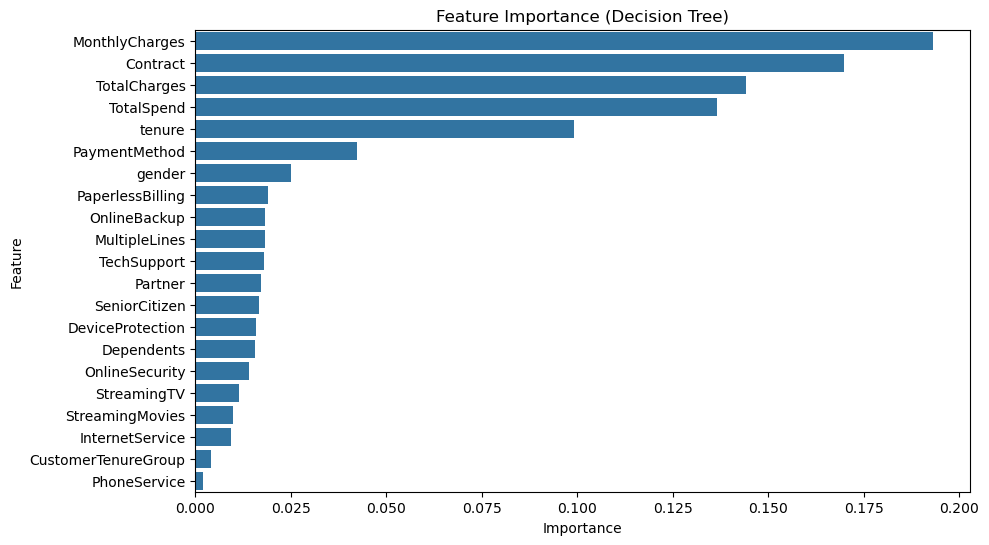

                Feature  Importance
17       MonthlyCharges    0.193177
14             Contract    0.169744
18         TotalCharges    0.144186
19           TotalSpend    0.136662
4                tenure    0.099136
16        PaymentMethod    0.042365
0                gender    0.025134
15     PaperlessBilling    0.019108
9          OnlineBackup    0.018206
6         MultipleLines    0.018148
11          TechSupport    0.017990
2               Partner    0.017291
1         SeniorCitizen    0.016735
10     DeviceProtection    0.015921
3            Dependents    0.015513
8        OnlineSecurity    0.013994
12          StreamingTV    0.011537
13      StreamingMovies    0.009817
7       InternetService    0.009229
20  CustomerTenureGroup    0.004039
5          PhoneService    0.002067


In [71]:
# Fit a Decision Tree model
model = DecisionTreeClassifier(random_state=42)
model.fit(X, y)

# Get feature importances
feature_importances = model.feature_importances_

# Create a DataFrame to display the importance
feature_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# Sort the features by importance
feature_df = feature_df.sort_values(by='Importance', ascending=False)

# Plot the feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_df)
plt.title('Feature Importance (Decision Tree)')
plt.show()

print(feature_df)

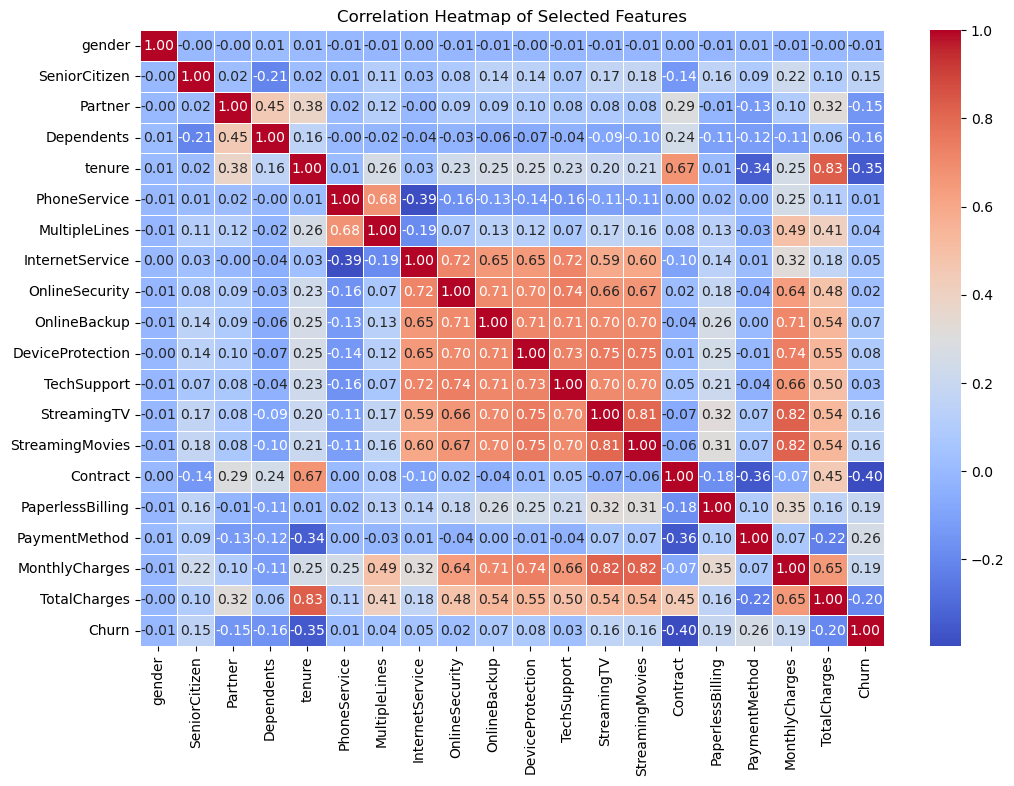

In [72]:
# Selecting the required columns
selected_columns = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 
                    'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
                    'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 
                    'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']

df_selected = df[selected_columns]

# Compute correlation matrix
corr_matrix = df_selected.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap of Selected Features")
plt.show()

Note: The correlation heatmap shows us that churn is significantly negatively correlated with tenure, meaning the longer the tenure is the less the likelihood for churn. The same relationship holds between contract and churn.

### Scaling

In [73]:
scaler = StandardScaler() #creates an instance of the StandardScaler class 

# Fit and transform the training set, and transform the test set
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Train and Evaluate Multiple Models

In [74]:
# Initialize the logistic regression model
model = LogisticRegression(max_iter=1000)  # max_iter is for convergence, increase if needed

# Train the model
model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000)

Accuracy: 0.7977
              precision    recall  f1-score   support

           0       0.84      0.89      0.87      1035
           1       0.64      0.54      0.59       374

    accuracy                           0.80      1409
   macro avg       0.74      0.71      0.73      1409
weighted avg       0.79      0.80      0.79      1409



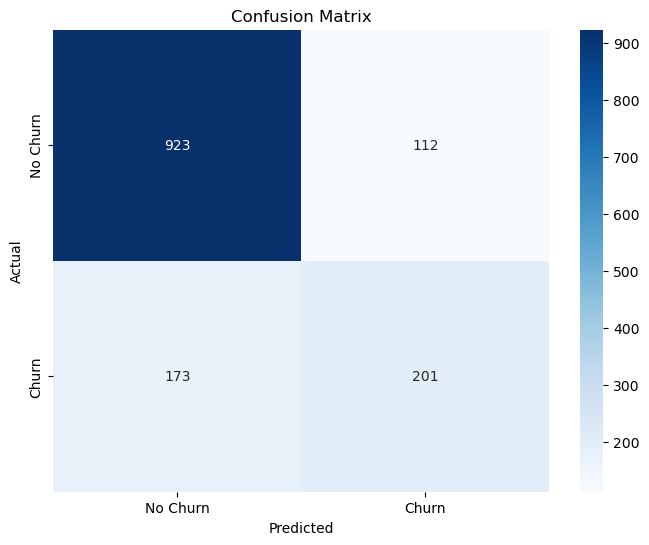

In [75]:
# Predict on test data
y_pred = model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')
print(classification_report(y_test, y_pred))

# Compute and visualize the confusion matrix as a heatmap
cm = confusion_matrix(y_test, y_pred)

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

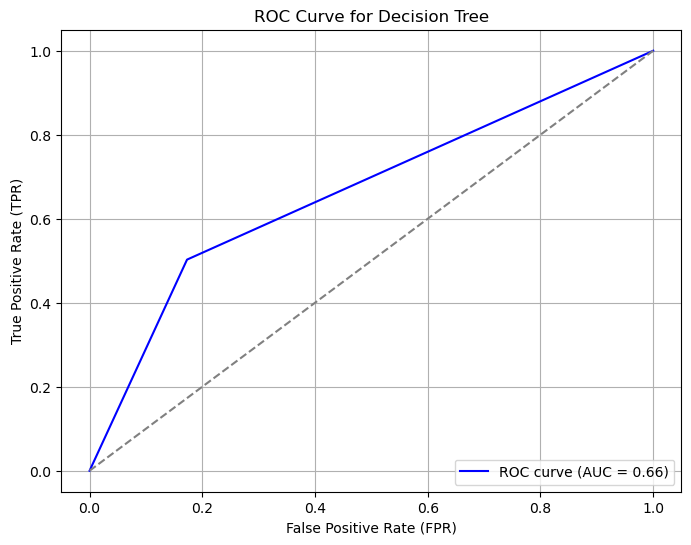

Accuracy: 0.7410
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.83      0.82      1035
           1       0.51      0.50      0.51       374

    accuracy                           0.74      1409
   macro avg       0.67      0.66      0.67      1409
weighted avg       0.74      0.74      0.74      1409

Confusion Matrix:
[[857 178]
 [187 187]]


In [76]:
# Initialize and train the Decision Tree Classifier
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test_scaled)

# Compute the predicted probabilities for the positive class (Churn = 1)
y_prob = model.predict_proba(X_test_scaled)[:, 1]  # probabilities for class 1 (churn)

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculate the AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line (no discrimination)
plt.title('ROC Curve for Decision Tree')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Optional: Display the accuracy and classification report
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

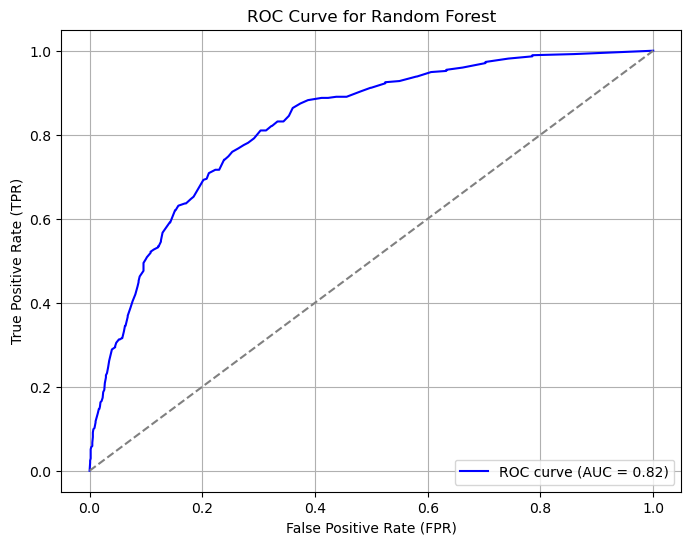

Accuracy: 0.7949
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.90      0.87      1035
           1       0.64      0.51      0.57       374

    accuracy                           0.79      1409
   macro avg       0.74      0.70      0.72      1409
weighted avg       0.78      0.79      0.79      1409

Confusion Matrix:
[[930 105]
 [184 190]]


In [77]:
# Initialize and train the Random Forest Classifier
model = RandomForestClassifier(random_state=42, n_estimators=100)  # You can adjust n_estimators for more trees
model.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test_scaled)

# Compute the predicted probabilities for the positive class (Churn = 1)
y_prob = model.predict_proba(X_test_scaled)[:, 1]  # probabilities for class 1 (churn)

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculate the AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line (no discrimination)
plt.title('ROC Curve for Random Forest')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Optional: Display the accuracy and classification report
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

#### Hyper Parameter Tuning

In [78]:
# Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees
    'max_depth': [10, 20, None],  # Tree depth (None means unlimited depth)
    'min_samples_split': [2, 5, 10],  # Minimum samples to split
    'min_samples_leaf': [1, 2, 4],  # Minimum samples per leaf
    'max_features': ['sqrt', 'log2'],  # Feature selection method
    'class_weight': ['balanced', None]  # Handling class imbalance
}

# Initialize Random Forest Classifier
rf = RandomForestClassifier(random_state=42)

# Perform Grid Search with Cross-Validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           cv=5, scoring='roc_auc', n_jobs=-1, verbose=2)

# Fit the model
grid_search.fit(X_train_scaled, y_train)

# Best parameters
print("Best Hyperparameters:", grid_search.best_params_)
print("Best ROC AUC Score:", grid_search.best_score_)

# Use the best model
best_rf = grid_search.best_estimator_

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best Hyperparameters: {'class_weight': 'balanced', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}
Best ROC AUC Score: 0.845602686764229


#### Train the Model with Best Hyperparameters

In [79]:
best_rf.fit(X_train_scaled, y_train) #train a Random Forest model (best_rf) on the scaled training data

RandomForestClassifier(class_weight='balanced', max_depth=10,
                       min_samples_leaf=4, min_samples_split=10,
                       n_estimators=200, random_state=42)

In [80]:
#evaluating the performance of the trained Random Forest model (best_rf) on the test set
y_pred = best_rf.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f"Final Model Accuracy: {accuracy:.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred))


Final Model Accuracy: 0.7715
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.77      0.83      1035
           1       0.55      0.76      0.64       374

    accuracy                           0.77      1409
   macro avg       0.73      0.77      0.74      1409
weighted avg       0.81      0.77      0.78      1409



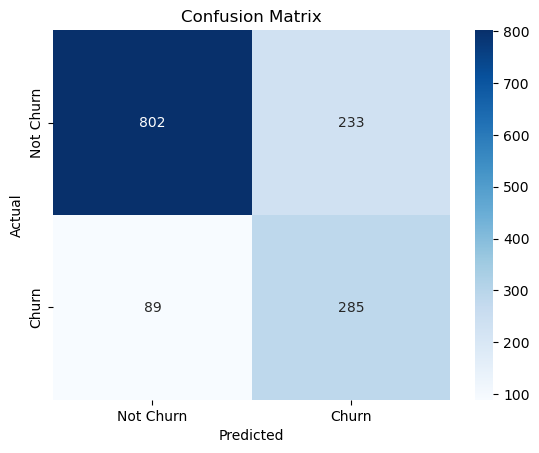

In [81]:
#used to visualize the performance of classification model by plotting the confusion matrix using a heatmap
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Churn', 'Churn'], yticklabels=['Not Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Final Model ROC AUC Score: 0.8432


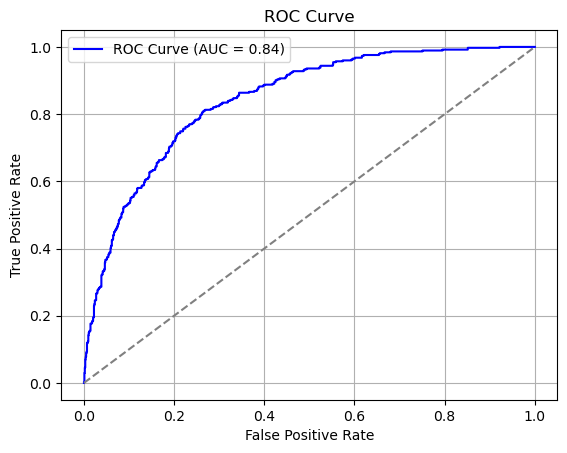

In [82]:
y_prob = best_rf.predict_proba(X_test_scaled)[:, 1]  # Get probability for class 1
roc_auc = roc_auc_score(y_test, y_prob)
print(f"Final Model ROC AUC Score: {roc_auc:.4f}")

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})', color='blue')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Baseline
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()

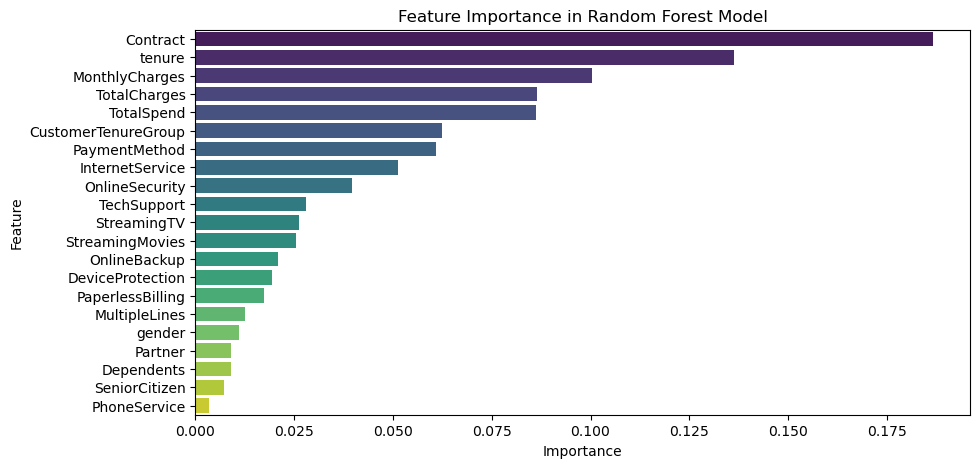

In [83]:
# Get feature importances
importances = best_rf.feature_importances_
feature_names = X_train.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot Feature Importance
plt.figure(figsize=(10, 5))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Feature Importance in Random Forest Model')
plt.show()

Final Model Accuracy: 0.7977
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.89      0.87      1035
           1       0.64      0.54      0.59       374

    accuracy                           0.80      1409
   macro avg       0.74      0.71      0.73      1409
weighted avg       0.79      0.80      0.79      1409



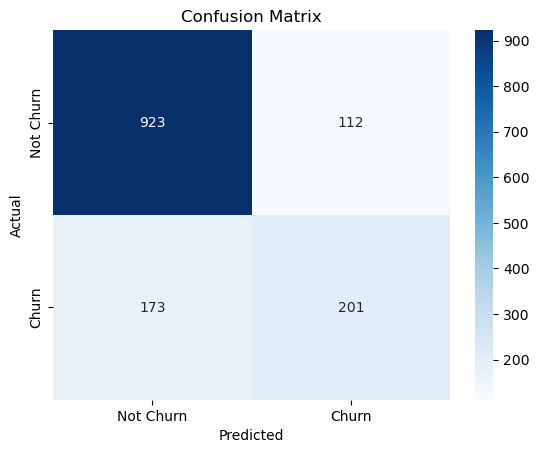

Final Model ROC AUC Score: 0.8410


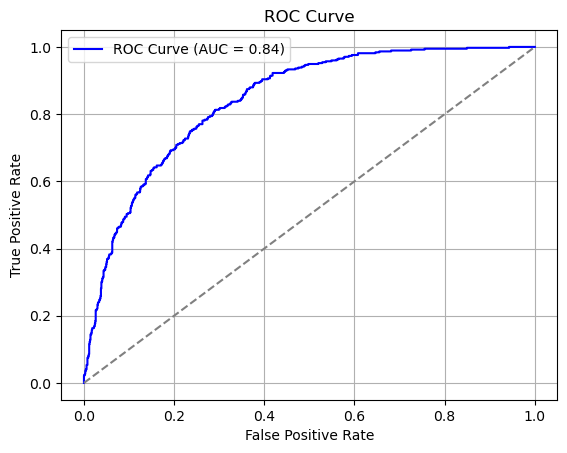

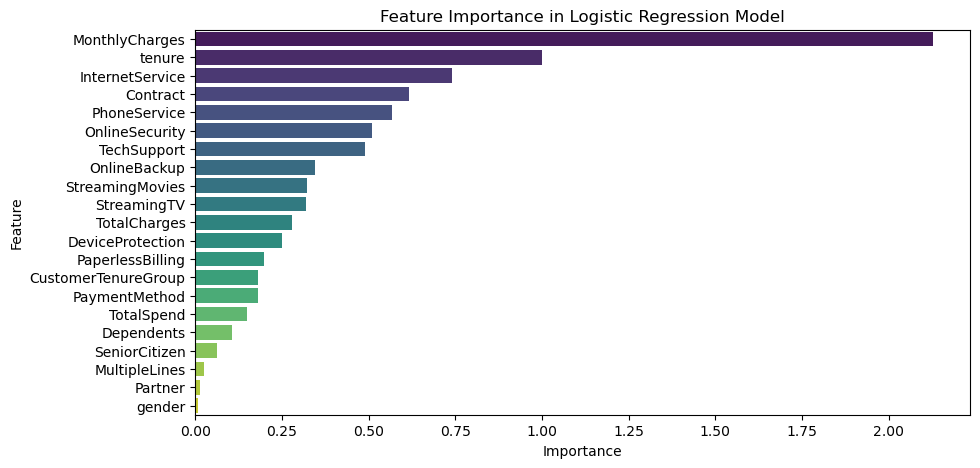

In [86]:
# Initialize and train Logistic Regression model
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train_scaled, y_train)

# Make predictions
y_pred = log_reg.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f"Final Model Accuracy: {accuracy:.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Churn', 'Churn'], yticklabels=['Not Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Get probability scores for ROC-AUC
y_prob = log_reg.predict_proba(X_test_scaled)[:, 1]
roc_auc = roc_auc_score(y_test, y_prob)
print(f"Final Model ROC AUC Score: {roc_auc:.4f}")

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})', color='blue')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Baseline
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()

# Feature Importance (Logistic Regression Coefficients)
importances = abs(log_reg.coef_[0])  # Absolute values of coefficients
feature_names = X_train.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot Feature Importance
plt.figure(figsize=(10, 5))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Feature Importance in Logistic Regression Model')
plt.show()

#### Use joblib to save the trained model.

Takeaways and observations

In [85]:
import joblib

joblib.dump(log_reg, 'churn_prediction_model.pkl')  # Save model

['churn_prediction_model.pkl']

#### Scheduled Batch Predictions: Automate weekly churn predictions for the company.